<a href="https://colab.research.google.com/github/coder-rakeshpaul/EmotionAnalysis/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import nltk
import string
import re
import inflect

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the data amd converting it into a dataframe

In [2]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
df3 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv')
frames = [df1, df2, df3]
data = pd.concat(frames)

Droping unnecessary columns

In [3]:
data=data.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id','example_very_unclear'], axis=1)
data.shape

(211225, 29)

Droping the duplicates

In [4]:
data.drop_duplicates(subset='text', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(57732, 29)

Droping data with mixed emotions

In [5]:
sum = np.array(data.sum(axis=1))
ind = np.where(np.logical_or(sum>1, sum==0))[0].tolist()
data.drop(ind, inplace = True)
data.reset_index(drop=True, inplace=True)
data.shape

C:\Users\mayur\AppData\Local\Temp\ipykernel_4132\1218242578.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = np.array(data.sum(axis=1))


(46741, 29)

Creating a list of emotions

In [6]:
emotions = list(data.columns)[1:]

In [7]:
emo = []
for text in range(0, data.shape[0]):
  for emotion in emotions:
    if data.loc[text][emotion] == 1:
      emo.append(emotion)


In [8]:
data.drop(data.iloc[:, 1:29], inplace=True, axis=1)

In [9]:
data

,text
0,That game hurt.
1,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...
...,...
46736,Oh [NAME] i forgot about those. I used to love...
46737,I didn’t even notice that one. I noticed the b...
46738,"Thanks, [NAME]"
46739,Everyone likes [NAME].


In [10]:
data['Emotions']= emo

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Emotion_id'] = le.fit_transform(data['Emotions'])

data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


c:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emotion_id'>

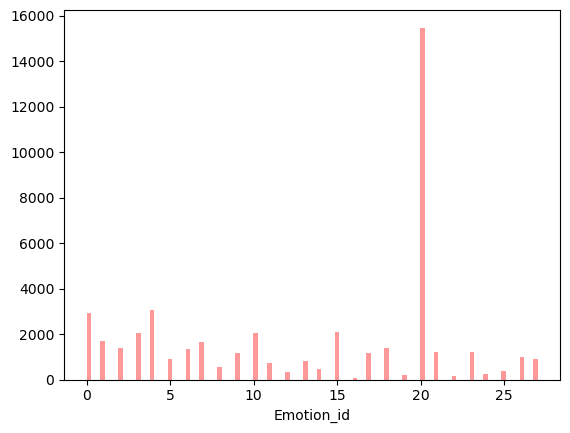

In [11]:
from seaborn import distplot

distplot(data['Emotion_id'], kde=False, color='red', bins=100)

Preprocessing the data

In [12]:
def text_lowercase(text):
	return text.lower()
 
import string
# remove punctuation
def remove_punctuation(text):
	return text.translate(str.maketrans('', '', string.punctuation))

Removing stop words

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
# remove stopwords function
def remove_stopwords_tokenize_and_stem(text):
	stop_words = set(stopwords.words("english"))
	word_tokens = word_tokenize(text)
	filtered_text = [word for word in word_tokens if word not in stop_words]
	stems = [stemmer.stem(word) for word in filtered_text]
	return stems

Stemming the data

In [14]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
	word_tokens = word_tokenize(text)
	stems = [stemmer.stem(word) for word in word_tokens]
	return stems

In [15]:
def text_preprocess(text):
  t = remove_punctuation(text)
  t = text_lowercase(t)
  t = remove_stopwords_tokenize_and_stem(t)
  return t

In [16]:
data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


In [17]:
data['tokenized'] = data.apply(lambda x: text_preprocess(x['text']), axis=1)

In [18]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46737,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46738,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46739,Everyone likes [NAME].,love,18,"[everyon, like, name]"


**Removing rows in which the token list is empty (this occurs due to stemming)**

In [19]:
emp_token_ind = []

tokens = data['tokenized'].to_numpy()
for i in range(0, tokens.size):
    if len(tokens[i]) == 0:
        emp_token_ind.append(i)

data.drop(emp_token_ind ,axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [20]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]"


In [21]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(window=5, min_count=1, workers=4, sg=0)

model.build_vocab(data['tokenized'], progress_per=1000)
model.train(data['tokenized'], total_examples=model.corpus_count, epochs=model.epochs)

model.save("main/saved models/word2vec.model")

In [22]:
model.wv.most_similar('best')
(model.wv['game'] + model.wv['hurt'])/2

array([-0.3973438 ,  0.35081518,  0.2689892 ,  0.19921818,  0.17258641,
       -1.0310723 ,  0.30202582,  1.3513718 , -0.6655251 , -0.5250918 ,
       -0.44280535, -0.68056643, -0.29470333,  0.29624873,  0.21318057,
       -0.21513933, -0.14844549, -0.46180987,  0.01194771, -1.0862317 ,
        0.34368485,  0.0898204 ,  0.42637837, -0.6332368 , -0.0751239 ,
        0.06046883, -0.11419323, -0.50458664, -0.7542591 , -0.18876371,
        0.41058606,  0.14714493,  0.3791031 , -0.45376545,  0.12115659,
        0.9776548 , -0.07194802, -0.5998069 , -0.521863  , -0.94673234,
        0.15371007, -0.46404582, -0.35749963, -0.04238157,  0.5677838 ,
       -0.40379792, -0.23396711, -0.1248076 ,  0.30823198,  0.59973043,
        0.40816563, -0.26451978, -0.33816725,  0.03378657, -0.3106585 ,
        0.34004307,  0.3293491 , -0.09609746, -0.57579374,  0.15945634,
        0.20678605,  0.428821  , -0.15131907, -0.19092134, -0.5672572 ,
        0.48885918,  0.27739733,  0.4544645 , -0.8963984 ,  0.82

Vectorize the tokenized lists

In [23]:
inputs = []

for token in data['tokenized']:
    inputs.append(model.wv[token])

data['Inputs'] = inputs


In [24]:
print(data['Inputs'][0])

[[-0.55873543  0.22207835  0.35822698  0.26257202  0.28263277 -1.2718939
   0.47653553  1.5410419  -0.890885   -0.5789248  -0.56829876 -0.6406763
  -0.34027362  0.33496866  0.20147468 -0.26416835 -0.3361619  -0.55682623
  -0.12980743 -1.2060918   0.49532172  0.01381759  0.43292242 -0.8905526
  -0.05970089  0.02615761 -0.02942573 -0.6351065  -0.9500053  -0.31050315
   0.34692597  0.2550373   0.5042237  -0.33158547  0.18572031  1.3447797
  -0.13707036 -0.68203586 -0.54063    -1.1405815   0.16237809 -0.5030103
  -0.45552775 -0.03384733  0.6777265  -0.45706385 -0.19670328 -0.22331902
   0.3910365   0.763216    0.5785145  -0.1476085  -0.48426464  0.09990761
  -0.366725    0.46316642  0.3783078  -0.17667386 -0.6330125   0.10290302
   0.27077663  0.63601077 -0.27672946 -0.4446697  -0.72576255  0.44665655
   0.31827965  0.4721102  -1.0572621   0.86245114  0.16949694  0.1778366
   0.19795658  0.22300814  0.87668097 -0.10385139  0.6609683  -0.26383954
  -0.49843735  0.45225534  0.27965513  0.273

Perform **Average Word2Vec** on the input column

In [25]:
inputs = []
for input in data['Inputs']:
    sum = 0
    for i in input:
        sum = sum + i
    avg = sum/len(input)
    inputs.append(avg)

data['Inputs'] = inputs


In [26]:
data

,text,Emotions,Emotion_id,tokenized,Inputs
0,That game hurt.,sadness,26,"[game, hurt]","[-0.3973438, 0.35081518, 0.2689892, 0.19921818..."
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]","[-0.1381881, 0.6441082, 0.20774241, 0.14830495..."
2,Man I love reddit.,love,18,"[man, love, reddit]","[-0.3656633, 0.49714097, 0.2097138, 0.22056825..."
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]","[-0.15839972, 0.1606732, 0.15845345, 0.1215725..."
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam...","[-0.2382009, 0.5450572, 0.12214177, 0.1537656,..."
...,...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]","[-0.332473, 0.4800395, 0.24068661, 0.2230895, ..."
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]","[-0.29448888, 0.5965891, 0.18924767, 0.1982171..."
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]","[-0.4047569, 0.35482204, 0.2127144, 0.24781388..."
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]","[-0.23960154, 0.6157982, 0.2757593, 0.31679454..."


In [27]:
data.to_csv('main/saved data/tokenized_inputs.csv')

Since the emotions classes are imbalanced we apply **SMOTE algorithm** to generate synthetic data

In [33]:
X = np.array([input for input in data['Inputs']])
y = np.array(data['Emotion_id'])

In [34]:
smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

c:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

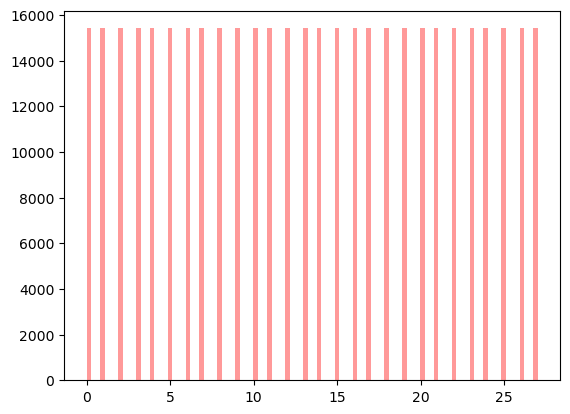

In [35]:
distplot(y, kde=False, color='red', bins=100)

In [36]:
df = {'Input':X.tolist(), 'Output':y, 'Emotions':le.inverse_transform(y)}
df_io = pd.DataFrame(df)

In [37]:
X = np.array([input for input in df_io['Input']])
y = np.array(df_io['Output'])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators = 100)  
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
from sklearn.metrics import accuracy_score

y_pred = RFC.predict(X_test)
accuracy_score(y_test, y_pred)

0.9454427490644515

In [44]:
import joblib

joblib.dump(RFC, 'main\saved models\model_RVC.joblib')

['main\\saved models\\model_RVC.joblib']